<a href="https://colab.research.google.com/github/MuhammadHaikalD4-TI/MuhammadHaikalD4-TI.github.io/blob/main/3A_20_Muhammad_Haikal_Buldan_Modul10.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import cv2 as cv
from google.colab.patches import cv_imshow
import numpy as np
import matplotlib.pyplot as plt

**Global Thresholding**

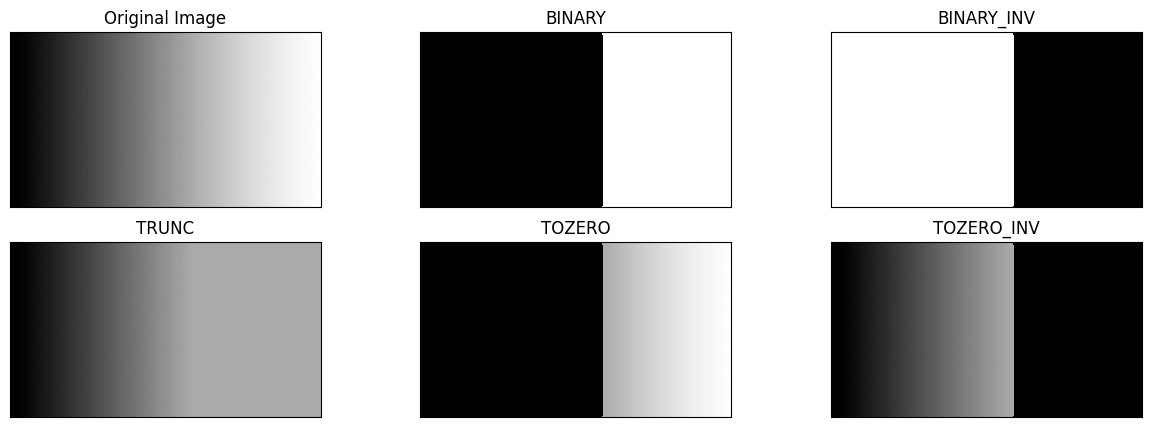

In [ ]:
filename_1 = ('/content/drive/MyDrive/PCVK/gradient.jpg')
img_g = cv.imread(filename_1, 0)
thresh1 = cv2.imread(filename_1)
thresh2 = cv2.imread(filename_1)
thresh3 = cv2.imread(filename_1)
thresh4 = cv2.imread(filename_1)
thresh5 = cv2.imread(filename_1)
thresh = 170    #nilai Threshold yang ditentukan

#1. Original Image
thresh1[img_g>thresh] = 255
thresh1[img_g<=thresh] = 0

#2. Binary threshold inverse
thresh2 = 255 - thresh1
#3. Threshold Truncate
thresh3[img_g>thresh] = thresh
#4. Threshold Tozero
thresh4[img_g<=thresh] = 0
#5. Threshold Tozero Inverse
thresh5[img_g>thresh] = 0

titles = ['Original Image','BINARY','BINARY_INV','TRUNC', 'TOZERO', 'TOZERO_INV']
images = [img_g, thresh1, thresh2, thresh3, thresh4, thresh5]

plt.figure(figsize = (15,5))
for i in range(len(images)):
  plt.subplot(2,3,i+1),plt.imshow(images[i],'gray', interpolation='nearest')
  plt.title(titles[i])
  plt.xticks([]),plt.yticks([])

plt.show()



**Otsu Thresholding**

<ipython-input-27-8b8ad2cdf954>:17: RuntimeWarning: invalid value encountered in divide
  mb = sumb / wb


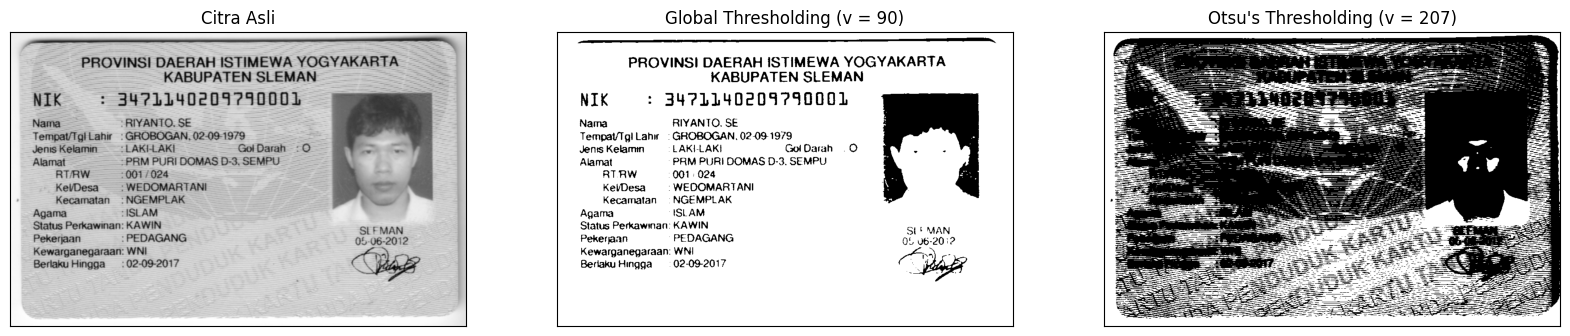

In [ ]:
img = cv.imread('/content/drive/MyDrive/PCVK/ktp 1.jpg',0)
blurred_img = cv. GaussianBlur (img, (5,5),0)

histogrm = cv.calcHist([blurred_img],[0],None,[256], [0,256])
hist_norm = histogrm.ravel()/histogrm.max()
Q = hist_norm.cumsum()
bins = np.arange (256)
wb = 0
sumb = 0
variationmax = 0
fn_min = np.inf
thresh = -1
for i in range(0,255):
  wb += histogrm[i]
  wf = (img.shape[0]*img.shape[1]) - wb
  sumb += (i*histogrm[i])
  mb = sumb / wb
  mf = (sumb - sumb)/wf
  varbetween = wb * wf * (mb - mf) * (mb - mf)
  if (varbetween>variationmax):
    variationmax = varbetween
    thresh = i
x = ("Otsu's Thresholding (v = ")+str(thresh)+")"
ret, th1 = cv.threshold(blurred_img, 127, 255, cv.THRESH_BINARY)
ret, th2 = cv.threshold (blurred_img, thresh, 255, cv. THRESH_BINARY)

titles = ['Citra Asli', 'Global Thresholding (v = 90)', x]
citra3 = [blurred_img, th1, th2]

plt. figure(figsize = (20,15))
for i in range(len(citra3)):
    plt. subplot(1,3,i+1),plt.imshow(citra3[i], 'gray')
    plt.title(titles[i])
    plt.xticks([]),plt.yticks([])
plt.show()

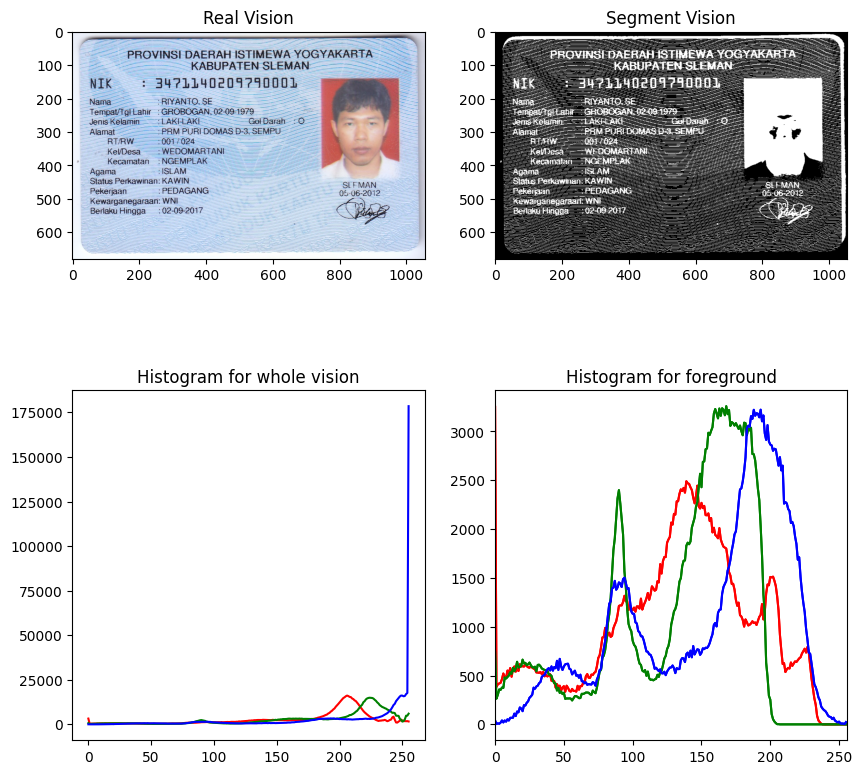

In [ ]:
img = cv.imread('/content/drive/MyDrive/PCVK/ktp 1.jpg')
img = cv.cvtColor(img, cv.COLOR_BGR2RGB)
img_gray = cv.cvtColor(img,cv.COLOR_BGR2GRAY)
thresh = 200

ret,mask = cv.threshold(img_gray,thresh,255,cv.THRESH_BINARY_INV)

plt.figure(figsize = (10,10))
plt.subplot(2,2,1),plt.imshow(img)
plt.title('Real Vision')
plt.subplot(2,2,2),plt.imshow(mask, 'gray')
plt.title('Segment Vision')
color = ('r','g','b')

for i,col in enumerate(color):
    hist0 = cv.calcHist([img],[i],None,[256],[0,256])
    plt.subplot(2,2,3),plt.plot(hist0,color = col)
    plt.title('Histogram for whole vision')
    hist1 = cv.calcHist([img],[i],mask,[256],[0,256])
    plt.subplot(2,2,4),plt.plot(hist1,color = col)
    plt.title('Histogram for whole vision')
    hist1 = cv.calcHist([img],[i],mask,[256],[0,256])
    plt.subplot(2,2,4),plt.plot(hist1,color = col)
    plt.title('Histogram for foreground')
    plt.xlim([0,256])

plt.show()

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


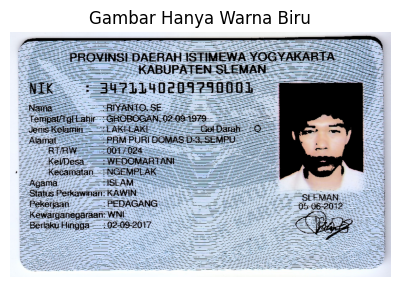

In [ ]:
import cv2
import numpy as np
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# Muat gambar "ktp Riyanto.jpg"
image = cv2.imread('/content/drive/MyDrive/PCVK/ktp 1.jpg')
image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

# Bentuk ulang gambar ke dalam bentuk satu dimensi (array piksel) untuk digunakan dalam algoritma K-Means
pixels = image_rgb.reshape(-1, 3)

# Terapkan algoritma K-Means dengan 2 kluster (biru dan non-biru)
kmeans = KMeans(n_clusters=2)
kmeans.fit(pixels)
labels = kmeans.labels_

# Dapatkan label kluster yang sesuai dengan warna biru (kluster dengan warna biru yang dominan)
blue_cluster = np.argmax(np.bincount(labels))
blue_mask = (labels == blue_cluster).reshape(image_rgb.shape[:2])

# Model 1: Gambar Asli dengan Warna Biru Diberi Warna Merah
result1 = np.copy(image_rgb)
result1[blue_mask] = [255, 0, 0]

# Model 2: Gambar Hanya dengan Warna Biru
result2 = np.zeros_like(image_rgb)
result2[blue_mask] = image_rgb[blue_mask]

# Model 3: Gambar Hanya dengan Warna Biru, Lainnya Diberi Warna Hitam
result3 = np.zeros_like(image_rgb)
result3[blue_mask] = image_rgb[blue_mask]
result3[~blue_mask] = [0, 0, 0]

# Tampilkan tiga model
plt.figure(figsize=(12, 4))

plt.subplot(132)
plt.imshow(result2)
plt.title("Gambar Hanya Warna Biru")
plt.axis('off')


plt.tight_layout()
plt.show()


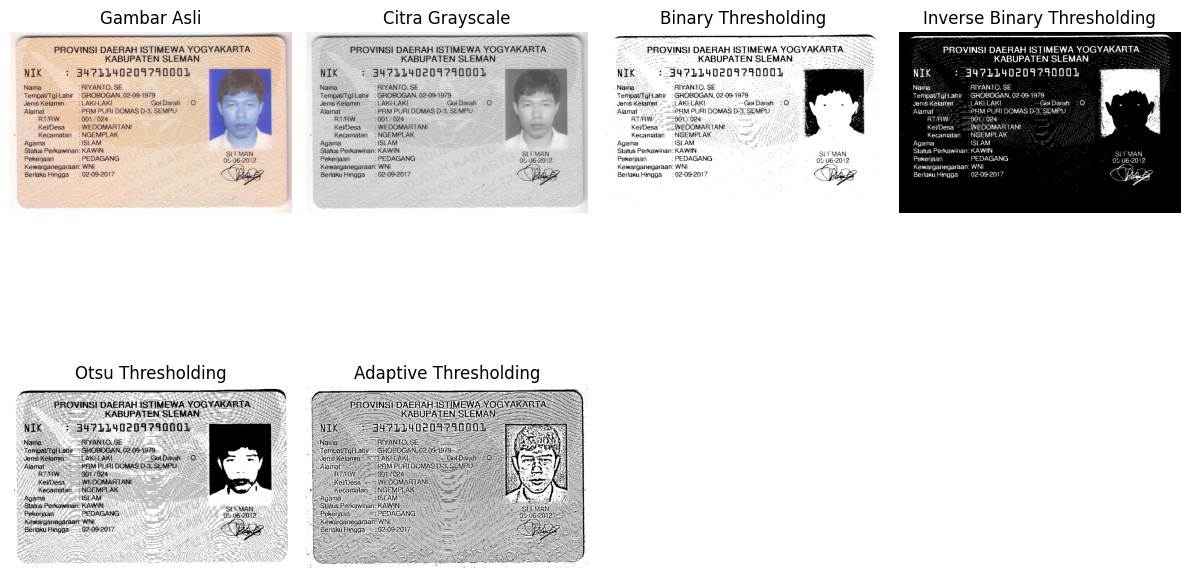

In [ ]:
import cv2
import matplotlib.pyplot as plt

# Muat gambar KTP
ktp_image = cv2.imread('/content/drive/MyDrive/PCVK/ktp 1.jpg')

# Konversi ke citra grayscale
gray_image = cv2.cvtColor(ktp_image, cv2.COLOR_BGR2GRAY)

# Metode Thresholding Biner
ret, binary_threshold = cv2.threshold(gray_image, 127, 255, cv2.THRESH_BINARY)

# Metode Thresholding Biner Terbalik
ret, inverse_binary_threshold = cv2.threshold(gray_image, 127, 255, cv2.THRESH_BINARY_INV)

# Metode Thresholding Otsu
ret, otsu_threshold = cv2.threshold(gray_image, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)

# Metode Thresholding Adaptif
adaptive_threshold = cv2.adaptiveThreshold(gray_image, 255, cv2.ADAPTIVE_THRESH_MEAN_C, cv2.THRESH_BINARY, 11, 2)

# Tampilkan hasil thresholding
plt.figure(figsize=(12, 8))

plt.subplot(241)
plt.imshow(ktp_image)
plt.title('Gambar Asli')
plt.axis('off')

plt.subplot(242)
plt.imshow(gray_image, cmap='gray')
plt.title('Citra Grayscale')
plt.axis('off')

plt.subplot(243)
plt.imshow(binary_threshold, cmap='gray')
plt.title('Binary Thresholding')
plt.axis('off')

plt.subplot(244)
plt.imshow(inverse_binary_threshold, cmap='gray')
plt.title('Inverse Binary Thresholding')
plt.axis('off')

plt.subplot(245)
plt.imshow(otsu_threshold, cmap='gray')
plt.title('Otsu Thresholding')
plt.axis('off')

plt.subplot(246)
plt.imshow(adaptive_threshold, cmap='gray')
plt.title('Adaptive Thresholding')
plt.axis('off')

plt.tight_layout()
plt.show()
